In [1]:
# Import Required Libraries

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np

In [2]:
cd \Users\Gomu\Downloads

C:\Users\Gomu\Downloads


In [3]:
pwd

'C:\\Users\\Gomu\\Downloads'

In [4]:
import pandas as pd

df = pd.read_csv("os-data.csv")
df.head()

,Host ID,J(1): MIPS,J(1): RAM (MB),J(1): Bandwith (MB),J(1): Storage (Mbps)
0,0,1023,512,5000,5000
1,1,2048,1800,8000,8000
2,2,250,124,1000,1000
3,3,2048,1600,7000,7000
4,4,2600,1240,6000,6000


In [5]:
df1 = df.drop('Host ID', axis=1)

In [6]:
#Perform Scaling

X = StandardScaler().fit_transform(df1)

In [7]:
print(X)

[[-0.89959223 -1.56853493 -0.14558249 -0.26015137]
 [ 0.27510939  0.70245539  1.13520184  0.94509009]
 [-1.78548916 -2.25265313 -1.85329492 -1.86713998]
 [ 0.27510939  0.34981714  0.70827373  0.54334294]
 [ 0.90772919 -0.2849317   0.28134562  0.14159578]
 [ 0.79312415  0.22639375  0.06788157  0.06124635]
 [ 1.70996445  1.93668926  0.28134562  0.14159578]
 [-0.69674132 -0.74336143  0.28134562  0.14159578]
 [ 0.53182467  0.68834986  1.34098119  0.70082782]
 [ 1.69621184  1.13972682  1.77559401  1.43321288]
 [-1.17808247 -0.97257629 -1.72521649 -1.78679055]
 [ 0.22009897 -0.17914023  0.28134562  0.74421651]
 [ 1.2515443   0.79061495 -0.78597465  0.94509009]
 [-0.08016622  0.21581461  0.18784837  1.42718667]
 [ 0.10549394 -0.07687514  0.79365936 -0.50039617]
 [-1.38437154  1.05509364 -1.25559557 -1.06364567]
 [ 0.79312415 -0.7080976  -1.13648263 -1.1379689 ]
 [-0.56838368 -0.66578101  1.13520184 -1.36495604]
 [-1.04055643 -0.79273078 -0.93881491  1.13511649]
 [-0.92595139  1.13972682 -0.42

In [8]:
#Make Sparse Matrix

X_sparse = csr_matrix(X)

In [9]:
#Run SVD Model with One Less than Number of Features

tsvd = TruncatedSVD(n_components=X_sparse.shape[1]-1)
X_tsvd = tsvd.fit(X)

In [10]:
#Explained List of Variables

tsvd_var_ratios = tsvd.explained_variance_ratio_

In [11]:
#Create Function Calculating Number Of Components Required To Pass Threshold

# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

In [12]:
select_n_components(tsvd_var_ratios, 0.95)

3

In [13]:
#Run SVD with the Selected Number of Components

tsvd = TruncatedSVD(n_components=3)
X_tsvd = tsvd.fit_transform(X)

In [14]:
print(X_tsvd)

[[ 1.43272051 -1.12734877  0.05845766]
 [-1.51344422 -0.43728223  0.09284386]
 [ 3.86945775 -0.25579227 -0.06330158]
 [-0.93255408 -0.29378248 -0.01479092]
 [-0.54702438 -0.19802565 -0.32977728]
 [-0.58961044  0.28306254 -0.21580084]
 [-2.04327158  1.53714887 -0.44940398]
 [ 0.51667804 -0.89420909  0.13088673]
 [-1.61987598 -0.42000972 -0.2879505 ]
 [-3.02870002 -0.34208427 -0.27149471]
 [ 2.82821596  0.67556366 -0.18142141]
 [-0.53903473 -0.49825294  0.35875391]
 [-1.12724552  0.96717072  0.82863675]
 [-0.86865326 -0.48025208  1.0591943 ]
 [-0.15652638 -0.31250033 -0.85424422]
 [ 1.36302641  1.51174993  0.31193571]
 [ 1.0528652   0.75306673 -0.56794579]
 [ 0.74742772 -0.77424975 -1.54579626]
 [ 0.82150846 -0.65209488  1.66638891]
 [ 0.33404057  0.95812201  0.27482966]]


In [15]:
#Perform K-Means Clustering

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_tsvd)
y_kmeans=kmeans.predict(X_tsvd)
print(y_kmeans)

[2 0 1 0 0 0 0 2 0 0 1 0 0 0 2 2 2 2 2 2]


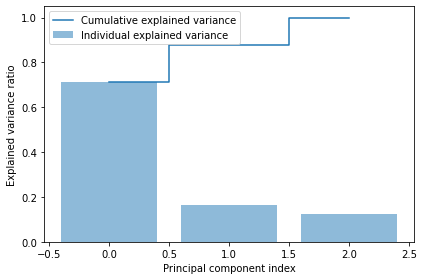

In [16]:
#Run Principal Component Analysis

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
# Determine transformed features
X_train_pca = pca.fit_transform(X_tsvd)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [17]:
#Select Number of Components = 3 and Perform PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_tsvd)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])
print(pca.explained_variance_ratio_)

[0.71258558 0.16467406 0.12274036]


In [18]:
print(principalComponents)

[[ 1.43272051 -1.12734877  0.05845766]
 [-1.51344422 -0.43728223  0.09284386]
 [ 3.86945775 -0.25579227 -0.06330158]
 [-0.93255408 -0.29378248 -0.01479092]
 [-0.54702438 -0.19802565 -0.32977728]
 [-0.58961044  0.28306254 -0.21580084]
 [-2.04327158  1.53714887 -0.44940398]
 [ 0.51667804 -0.89420909  0.13088673]
 [-1.61987598 -0.42000972 -0.2879505 ]
 [-3.02870002 -0.34208427 -0.27149471]
 [ 2.82821596  0.67556366 -0.18142141]
 [-0.53903473 -0.49825294  0.35875391]
 [-1.12724552  0.96717072  0.82863675]
 [-0.86865326 -0.48025208  1.0591943 ]
 [-0.15652638 -0.31250033 -0.85424422]
 [ 1.36302641  1.51174993  0.31193571]
 [ 1.0528652   0.75306673 -0.56794579]
 [ 0.74742772 -0.77424975 -1.54579626]
 [ 0.82150846 -0.65209488  1.66638891]
 [ 0.33404057  0.95812201  0.27482966]]


In [19]:
#Perform K-Means Clustering

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_tsvd)
y_kmeans=kmeans.predict(X_tsvd)
print(y_kmeans)

[2 1 0 1 1 1 1 2 1 1 0 1 1 1 2 2 2 2 2 2]
